In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sklearn
from scipy import stats
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import StandardScaler
from termcolor import colored as cl
from sklearn.metrics import explained_variance_score as evs
import os 
os.chdir(r'C:\Users\Shyam Adsul\Python codes SSPU\Data sets')

In [12]:
df=pd.read_csv('House Price.csv')

In [13]:
df.head()

,Id,LotFrontage,LotArea,Alley,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageType,GarageArea,SalePrice
0,1,65.0,8450,NaN,196.0,856,854,1710,Attchd,548,208500
1,2,80.0,9600,NaN,0.0,1262,0,1262,Attchd,460,181500
2,3,68.0,11250,NaN,162.0,920,866,1786,Attchd,608,223500
3,4,60.0,9550,NaN,0.0,961,756,1717,Detchd,642,140000
4,5,84.0,14260,NaN,350.0,1145,1053,2198,Attchd,836,250000


In [14]:
df.set_index('Id', inplace = True)

In [15]:
df.isnull().sum()

LotFrontage     259
LotArea           0
Alley          1369
MasVnrArea        8
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
GarageType       81
GarageArea        0
SalePrice         0
dtype: int64

In [16]:
df.describe()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,1162.626712,346.992466,1515.463699,472.980137,180921.195890
std,24.284752,9981.264932,181.066207,386.587738,436.528436,525.480383,213.804841,79442.502883
min,21.000000,1300.000000,0.000000,334.000000,0.000000,334.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,882.000000,0.000000,1129.500000,334.500000,129975.000000
50%,69.000000,9478.500000,0.000000,1087.000000,0.000000,1464.000000,480.000000,163000.000000
75%,80.000000,11601.500000,166.000000,1391.250000,728.000000,1776.750000,576.000000,214000.000000
max,313.000000,215245.000000,1600.000000,4692.000000,2065.000000,5642.000000,1418.000000,755000.000000


In [17]:
df.isnull().sum()

LotFrontage     259
LotArea           0
Alley          1369
MasVnrArea        8
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
GarageType       81
GarageArea        0
SalePrice         0
dtype: int64

In [18]:
#we can also see that there are some numerical values missing from columns- 
# 1.LotFrontage
# 2.MasVnrArea

# we will replace these values with median as there are outliers 

df['LotFrontage'].fillna(70.0,inplace=True)
df['MasVnrArea'].fillna(103.6,inplace=True)

In [19]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [20]:
# so lets name the NaN entries as Misssing in all the object datatype columns
df['Alley'].fillna('Missing',inplace=True)
df['GarageType'].fillna('Missing',inplace=True)

In [21]:
df1=df.copy()

In [22]:
#using dummies method to treat the categorical values
df_n= pd.get_dummies(df1['Alley'],drop_first=True,dtype=np.int64)
df1= pd.concat([df1,df_n],axis=1)
df_m= pd.get_dummies(df1['GarageType'],drop_first=True,dtype=np.int64)
df1= pd.concat([df1,df_m],axis=1)
df1.drop(['Alley','GarageType'],inplace=True,axis=1)

In [23]:
df1.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,856,854,1710,548,208500,1,0,1,0,0,0,0,0
2,80.0,9600,0.0,1262,0,1262,460,181500,1,0,1,0,0,0,0,0
3,68.0,11250,162.0,920,866,1786,608,223500,1,0,1,0,0,0,0,0
4,60.0,9550,0.0,961,756,1717,642,140000,1,0,0,0,0,0,1,0
5,84.0,14260,350.0,1145,1053,2198,836,250000,1,0,1,0,0,0,0,0


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   LotArea      1460 non-null   int64  
 2   MasVnrArea   1460 non-null   float64
 3   1stFlrSF     1460 non-null   int64  
 4   2ndFlrSF     1460 non-null   int64  
 5   GrLivArea    1460 non-null   int64  
 6   GarageArea   1460 non-null   int64  
 7   SalePrice    1460 non-null   int64  
 8   Missing      1460 non-null   int64  
 9   Pave         1460 non-null   int64  
 10  Attchd       1460 non-null   int64  
 11  Basment      1460 non-null   int64  
 12  BuiltIn      1460 non-null   int64  
 13  CarPort      1460 non-null   int64  
 14  Detchd       1460 non-null   int64  
 15  Missing      1460 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 193.9 KB


## Data Visualisation

<AxesSubplot:>

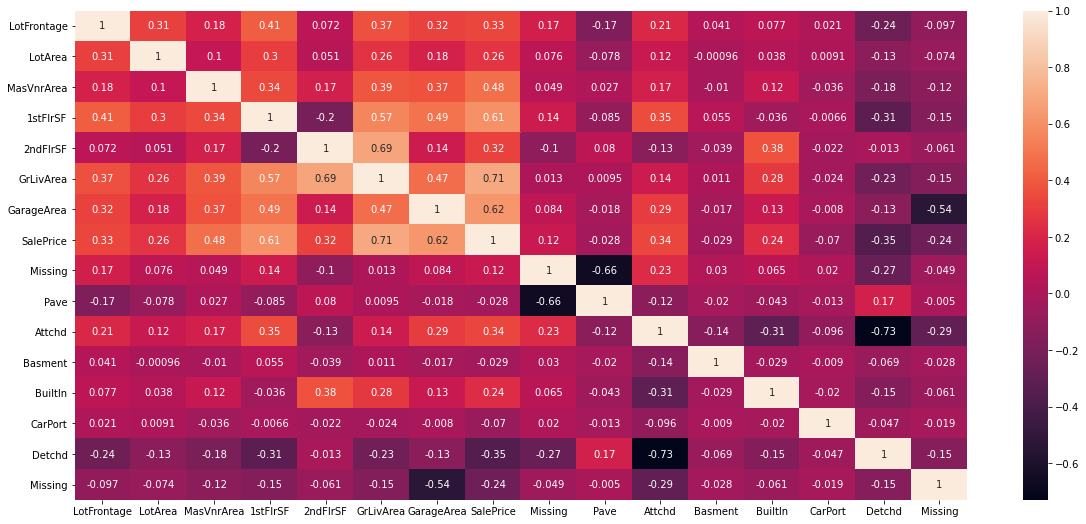

In [91]:
f, ax = plt.subplots(figsize=(20,9))
sns.heatmap(df1.corr(),annot=True)


In [29]:
x = pd.DataFrame(df1,columns = df1.columns)

In [30]:
df1.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,856,854,1710,548,208500,1,0,1,0,0,0,0,0
2,80.0,9600,0.0,1262,0,1262,460,181500,1,0,1,0,0,0,0,0
3,68.0,11250,162.0,920,866,1786,608,223500,1,0,1,0,0,0,0,0
4,60.0,9550,0.0,961,756,1717,642,140000,1,0,0,0,0,0,1,0
5,84.0,14260,350.0,1145,1053,2198,836,250000,1,0,1,0,0,0,0,0


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

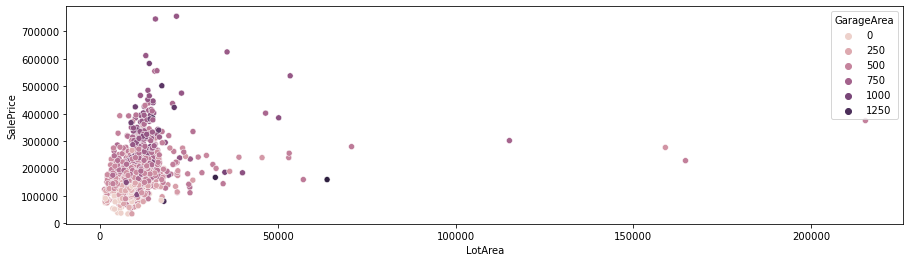

In [36]:
plt.figure(figsize=(15,4))
sns.scatterplot(x="LotArea",y="SalePrice",hue="GarageArea",data=df)

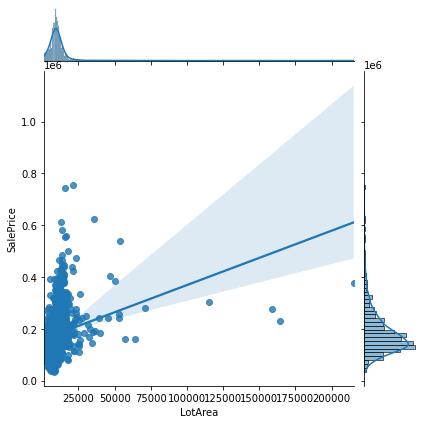

In [37]:
sns.jointplot(data=df,x="LotArea",y="SalePrice",kind="reg");

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>]],
      dtype=object)

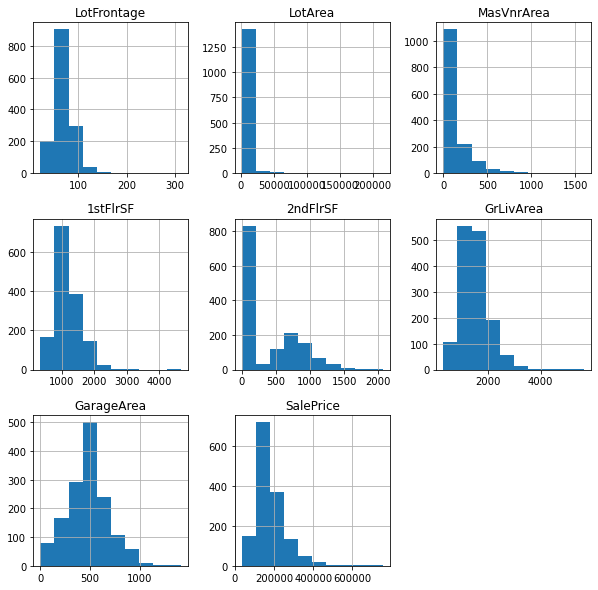

In [38]:
df.hist(figsize = (10,10))

<AxesSubplot:xlabel='SalePrice'>

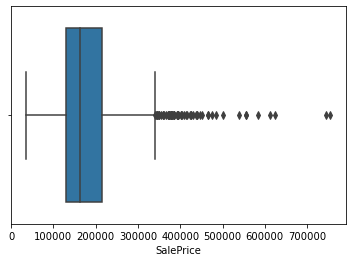

In [39]:
sns.boxplot(x='SalePrice',hue='LotArea',data=df)

<AxesSubplot:ylabel='LotArea'>

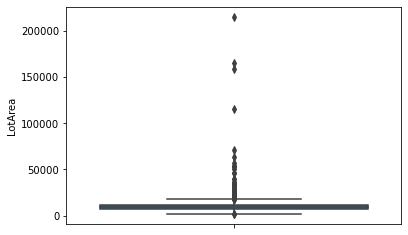

In [41]:
sns.boxplot(y = df['LotArea'])

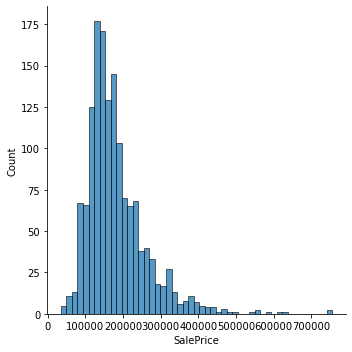

In [42]:
sns.displot(df.SalePrice)

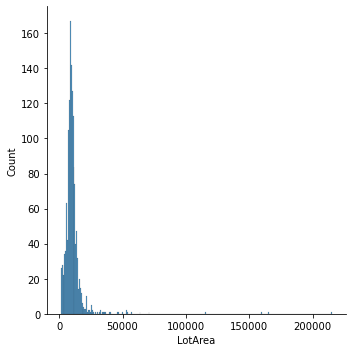

In [43]:
sns.displot(df.LotArea)

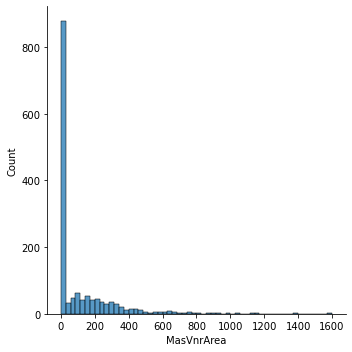

In [44]:
sns.displot(df.MasVnrArea)

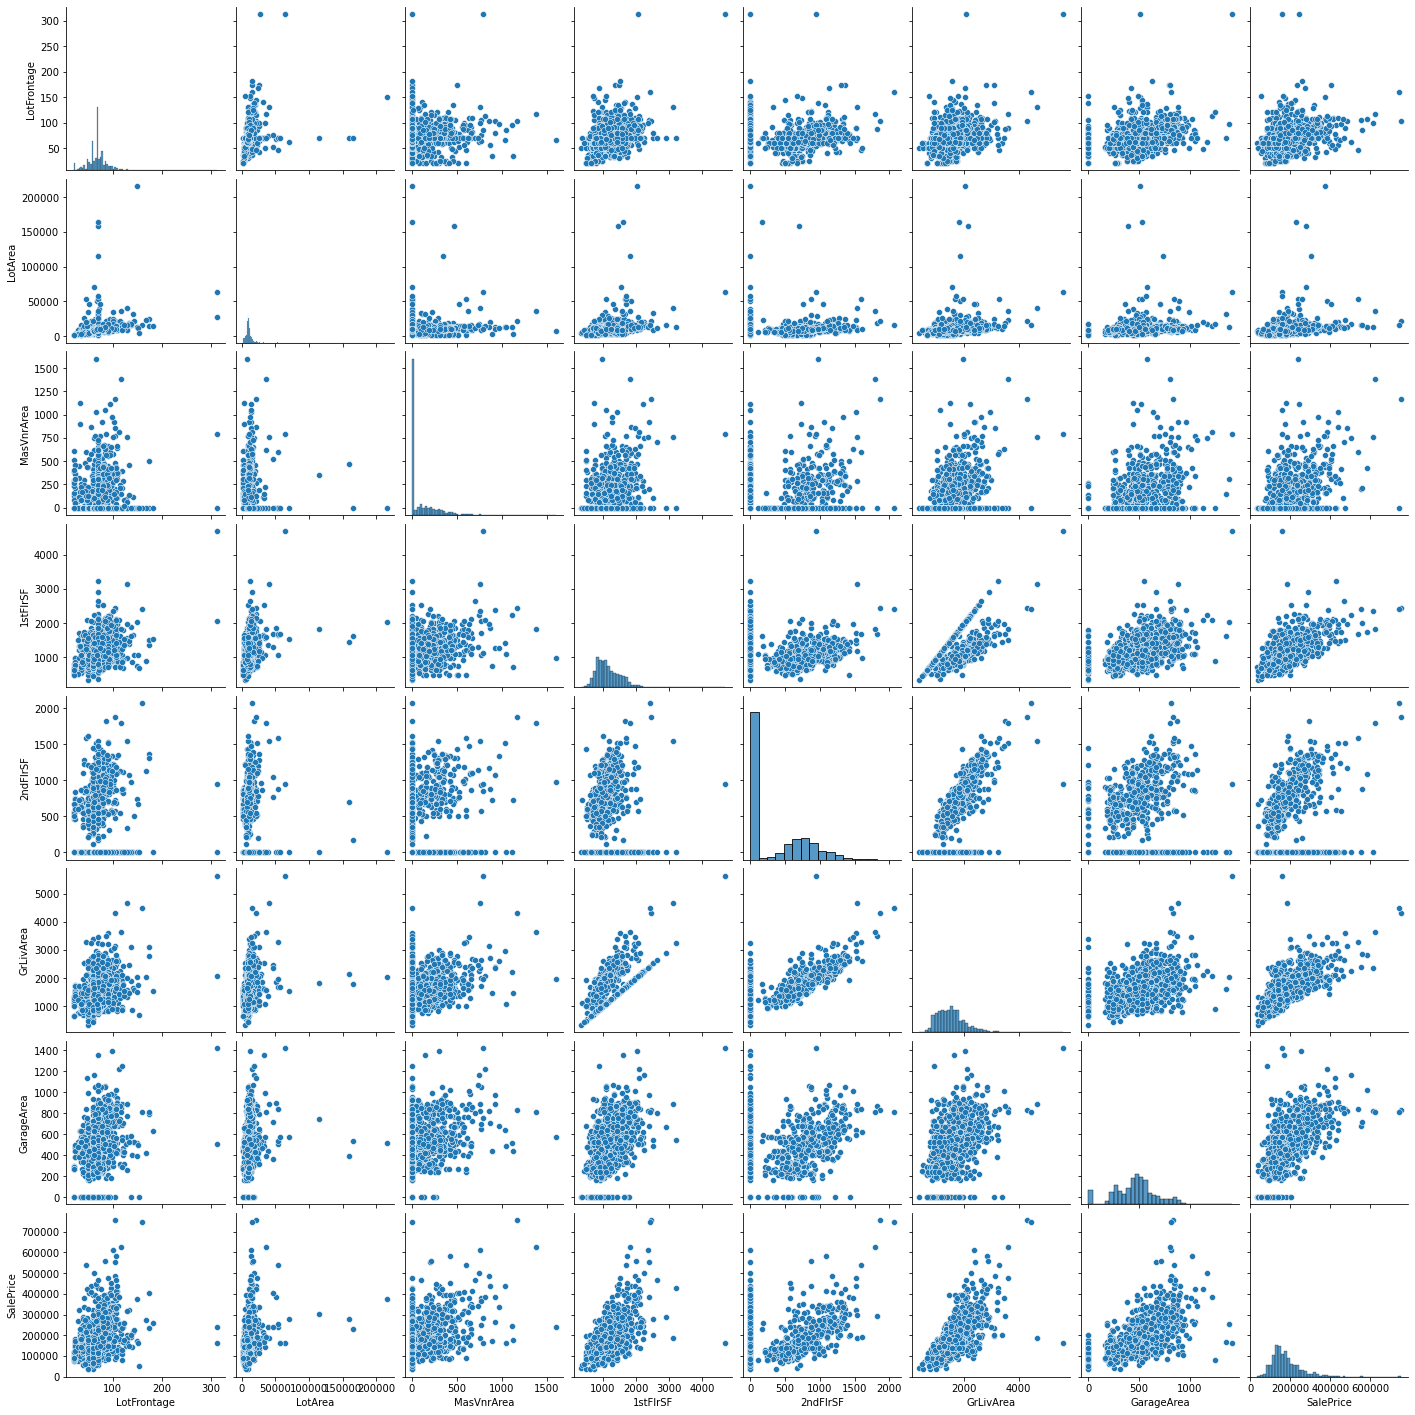

In [45]:
sns.pairplot(df)

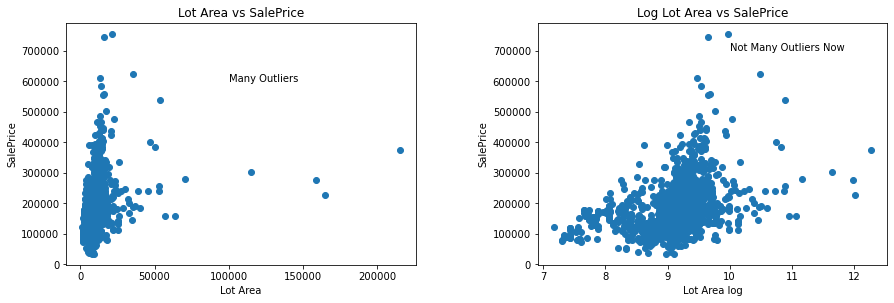

In [46]:
plt.subplot(122)
plt.xlabel("Lot Area log")
plt.ylabel("SalePrice")
plt.title("Log Lot Area vs SalePrice")
plt.text(10,700000,"Not Many Outliers Now")
plt.scatter(np.log(df["LotArea"]),df["SalePrice"])

plt.subplot(121)
plt.xlabel("Lot Area")
plt.ylabel("SalePrice")
plt.title("Lot Area vs SalePrice")
plt.scatter(df["LotArea"],df["SalePrice"])
plt.text(100000,600000,"Many Outliers")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=2.0, hspace=0.25,
                    wspace=0.35)

    From all these visualisations it is clear that the data is skewed and we need to do transformation on the dataset.
    For this project Log Transforfmation works better.
    1.Standar Scaler
    2.Log Transforfmation
    3.Min Max Scaler
    


## Feature Engineering

In [54]:
df2=df1.copy()

In [55]:
df2.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,65.0,8450,196.0,856,854,1710,548,208500,1,0,1,0,0,0,0,0
2,80.0,9600,0.0,1262,0,1262,460,181500,1,0,1,0,0,0,0,0
3,68.0,11250,162.0,920,866,1786,608,223500,1,0,1,0,0,0,0,0
4,60.0,9550,0.0,961,756,1717,642,140000,1,0,0,0,0,0,1,0
5,84.0,14260,350.0,1145,1053,2198,836,250000,1,0,1,0,0,0,0,0


In [56]:
df2['LotArea']=np.log(df2['LotArea'])
df2['1stFlrSF']=np.log(df2['1stFlrSF'])
df2['LotFrontage']=np.log(df2['LotFrontage'])
df2['GrLivArea']=np.log(df2['GrLivArea'])
df2['SalePrice']=np.log(df2['SalePrice'])

In [57]:
np.seterr(divide = 'ignore')
df2['MasVnrArea'] = np.where(df2['MasVnrArea']>0, np.log(df2['MasVnrArea']), 0)
df2['2ndFlrSF']=np.where(df2['2ndFlrSF']>0, np.log(df2['2ndFlrSF']), 0)
df2['GarageArea']=np.where(df2['GarageArea']>0, np.log(df2['GarageArea']), 0)

In [58]:
df2.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
Id,,,,,,,,,,,,,,,,
1,4.174387,9.041922,5.278115,6.752270,6.749931,7.444249,6.306275,12.247694,1,0,1,0,0,0,0,0
2,4.382027,9.169518,0.000000,7.140453,0.000000,7.140453,6.131226,12.109011,1,0,1,0,0,0,0,0
3,4.219508,9.328123,5.087596,6.824374,6.763885,7.487734,6.410175,12.317167,1,0,1,0,0,0,0,0
4,4.094345,9.164296,0.000000,6.867974,6.628041,7.448334,6.464588,11.849398,1,0,0,0,0,0,1,0
5,4.430817,9.565214,5.857933,7.043160,6.959399,7.695303,6.728629,12.429216,1,0,1,0,0,0,0,0


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1460 non-null   float64
 1   LotArea      1460 non-null   float64
 2   MasVnrArea   1460 non-null   float64
 3   1stFlrSF     1460 non-null   float64
 4   2ndFlrSF     1460 non-null   float64
 5   GrLivArea    1460 non-null   float64
 6   GarageArea   1460 non-null   float64
 7   SalePrice    1460 non-null   float64
 8   Missing      1460 non-null   int64  
 9   Pave         1460 non-null   int64  
 10  Attchd       1460 non-null   int64  
 11  Basment      1460 non-null   int64  
 12  BuiltIn      1460 non-null   int64  
 13  CarPort      1460 non-null   int64  
 14  Detchd       1460 non-null   int64  
 15  Missing      1460 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 193.9 KB


In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df1)
df2 = pd.DataFrame(scaler.fit_transform(df1),columns = df1.columns)

In [61]:
df2.head()

,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,SalePrice,Missing,Pave,Attchd,Basment,BuiltIn,CarPort,Detchd,Missing
0,-0.228969,-0.207142,0.511421,-0.793434,1.161852,0.370333,0.351000,0.347273,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
1,0.452338,-0.091886,-0.574408,0.257140,-0.795163,-0.482512,-0.060731,0.007288,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
2,-0.092708,0.073480,0.323063,-0.627826,1.189351,0.515013,0.631726,0.536154,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236
3,-0.456072,-0.096897,-0.574408,-0.521734,0.937276,0.383659,0.790804,-0.515281,0.257821,-0.169981,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.24236
4,0.634020,0.375148,1.364572,-0.045611,1.617877,1.299326,1.698485,0.869843,0.257821,-0.169981,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236


### Feature Selection and Regression Algorithms

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X=df2[['LotFrontage','LotArea','MasVnrArea','2ndFlrSF','GrLivArea','GarageArea','Attchd','Basment','BuiltIn','Detchd','Pave','Missing']]
y=df2['SalePrice']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [65]:
lm=LinearRegression()
lm.fit(X_train,y_train)
lm_yhat=lm.predict(X_test)
lm.score(X_test,y_test)

0.7574088254433071

In [66]:
from sklearn.metrics import r2_score
print('The R-squared value is ',r2_score(y_test,lm_yhat))
from sklearn.metrics import mean_absolute_error
print("mean_absolute_error  of the model is ",mean_absolute_error(y_test,lm_yhat))

The R-squared value is  0.7574088254433071
mean_absolute_error  of the model is  0.3361948213827315


In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [69]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

In [70]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

        feature        VIF
0   LotFrontage   1.365240
1       LotArea   1.161386
2    MasVnrArea   1.279992
3      2ndFlrSF   2.543019
4     GrLivArea   3.417457
5    GarageArea   2.129293
6        Attchd  24.172993
7       Basment   2.276901
8       BuiltIn   6.721935
9        Detchd  20.113879
10         Pave   1.806836
11      Missing   1.896303
12      Missing   6.884430


In [71]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [72]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [73]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

2.067504585181199e-05

In [74]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=2.067504585181199e-05)

In [75]:
lasso_reg.score(X_test, y_test)

0.7574042369320437

In [76]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([7.78444777, 5.94576616, 4.2142066 , 9.56816131, 5.596465  ,
       7.52457645, 7.94196395, 6.31322991, 0.26495017, 7.44617347,
       2.61473901, 5.09027231, 7.14272443, 0.82294616, 8.33677688,
       2.16285532, 6.85555043, 1.69048513, 6.66946527, 1.9483715 ,
       9.13395436, 8.67980981, 3.76505111, 4.48149836, 2.19317553,
       1.78676517, 5.20233969, 4.92499569, 3.61303377, 1.7620172 ,
       0.59842769, 7.83876159, 5.3389188 , 5.17167596, 3.47742822,
       6.10725816, 5.57608835, 3.34449669, 3.31202617, 2.04756942,
       6.3448392 , 9.96366274, 7.02332985, 1.75700691, 7.02181598,
       3.1851941 , 1.55957704, 0.45950018, 7.44985083, 0.64317378]),
        cv=10, normalize=True)

In [77]:
ridgecv.alpha_

0.2649501715635949

In [78]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.2649501715635949)

In [79]:
ridge_model.score(X_test, y_test)

0.7573714724329861

In [80]:
def adj_r2(X,y):
    r2=lm.score(X,y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [81]:
adj_r2(X_test,y_test)

0.7484239671263926

In [82]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [83]:
clf = tree.DecisionTreeRegressor(criterion='mse',
    splitter='random',
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features="auto",
    random_state=5,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    presort='deprecated',
    ccp_alpha=0.0)
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.6474687717159682

In [84]:
grid_param={
    'splitter':['best','random'],
    'max_depth':range(2,32,1),
    'min_samples_split':(2,10,1),
    'min_samples_leaf':(1,10,1),
    'random_state':(5,200,2),
    'min_weight_fraction_leaf':(0.0,20.0,1.0)}

In [87]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)

grid_search.score(X_test,y_test)

0.6474687717159682

In [88]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 5, 'splitter': 'random'}


In [89]:
from sklearn.metrics import mean_absolute_error,r2_score
print("R2 score ",r2_score(y_test,lm_yhat))
print("mean_absolute_error",mean_absolute_error(y_test,lm_yhat))

R2 score of the model is  0.7574088254433071
mean_absolute_error  of the model is  0.3361948213827315
